<a id="table-of-content"></a>
# Table of Content
- [1 Introduction](#1)
    - 1.1 About this Notebook
    - 1.2 About this Dataset
- [2 Preparation](#2)
    - [2.1 Drop unused Columns](#2.1)
    - [2.2 Repair Columns in wrong type](#2.2)
- [3 Data Overview](#3)
    - [3.1 Quick Look](#3.1)
    - [3.2 Basic Statistics](#3.2)
- [4 Visulization](#4)
    - [4.1 Distribution](#4.1)
    - [4.2 Top Of The World](#4.2)
        - [4.2.1 Top 10 Artist with Most Time On Chart](#4.2.1)
        - [4.2.2 Top 5 Some with Highest Streams](#4.2.2)

<a id='1'></a>
# 1 Introduction
## 1.1 About this Notebook
- This Notebook is my DS pratice project on `10/09/2021`, mainly about EDA (Exploratory Data Analysis).

## 1.2 About this Dataset
The dataset include all the songs that have been on the **Top 200 Weekly (Global) charts of Spotify in 2020 & 2021**. The dataset include the following features:
   - `Highest Charting Position`: The highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
   - `Number of Times Charted`: The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
   - `Week of Highest Charting`: The week when the song had the Highest Position in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
   - `Song Name`: Name of the song that has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
   - `Song iD`: The song ID provided by Spotify (unique to each song).
   - `Streams`: Approximate number of streams the song has.
   - `Artist`: The main artist/ artists involved in making the song.
   - `Artist Followers`: The number of followers the main artist has on Spotify.
   - `Genre`: The genres the song belongs to.
   - `Release Date`: The initial date that the song was released.
   - `Weeks Charted`: The weeks that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
   - `Popularity`:The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
   - `Danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
   - `Acousticness`: A measure from 0.0 to 1.0 of whether the track is acoustic.
   - `Energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
   - `Instrumentalness`: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
   - `Liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
   - `Loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
   - `Speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
   - `Tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
   - `Valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
   - `Chord`: The main chord of the song instrumental.

### Acknowledgements
This dataset would not be possible without the help of spotifycharts.com and Spotipy Python Library

<a id='2'></a>
# 2 Preparation
- Prepare the packages and data that will be used for the analysis process.
- This dataset contains 1 file.

In [1]:
# import packages
import os
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Some pandas display options
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)
pd.set_option('float_format', '{:.2f}'.format)

# Load the Dataset
df = pd.read_csv('./datasets/spotify_dataset.csv', )

<a id='2.1'></a>
## 2.1 Drop unused attributes (columns)
- Some of our attributes are useless, like: `Index`, `Song ID` and some are hard to use and have really little impact on our dataset (at least for my knowledge and experience at this point) like: `Week of Highest Charting`, `Genre`, `Weeks Charted` and `Chord`.

In [2]:
# Drop these columns all
df.drop(columns=['Index', 'Song ID', 'Week of Highest Charting', 'Genre', 'Weeks Charted', 'Chord'], inplace=True)

<a id='2.2'></a>
## 2.2 Repair Columns in wrong type
- Most attributes has the wrong data type, they should be number like `int` of `float`, not `object`: `Streams`, `Artist Followers`, `Popularity`, `Danceability`, `Energy`, `Louadness`, `Speechiness`, `Acousticness`, `Liveness`, `Tempo`, `Duration` and `Valence`. We have to change them.
- In columns that we want to repair, some of them ,`11` in particular, are strings with only `1` space (that's why when we call `null` function, it will return `0` null entry). We can't change these columns type without handle these 1-space strings, and we drop them for simplicity.

In [3]:
print('Number of Song with emty entries:', df[(df['Artist Followers'] == ' ')].shape[0])

Number of Song with emty entries: 11


In [4]:
# Drop theses emtyp columns (using there index)
df = df.drop(df[(df['Artist Followers'] == ' ')].index)

After drop these entries, we can now change columns' type.

In [5]:
# 'Streams' Attribute can't be turn into number since it has comma, remove them first
df['Streams'] = df['Streams'].replace(',', '', regex=True)

# These columns in int64 type
obj_to_int_cols = ["Streams", "Artist Followers", "Popularity"]

# And theses in float64
obj_to_float_cols = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
                     "Liveness", "Tempo", "Duration (ms)", "Valence"]

df[obj_to_int_cols] = df[obj_to_int_cols].astype('int64')
df[obj_to_float_cols] = df[obj_to_float_cols].astype('float64')

In [6]:
# Check it one again
df.dtypes

Highest Charting Position      int64
Number of Times Charted        int64
Song Name                     object
Streams                        int64
Artist                        object
Artist Followers               int64
Release Date                  object
Popularity                     int64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                float64
Valence                      float64
dtype: object

<a id='3'></a>
# 3 Data Overview
Take a quick look at our data to get a overal feel of our data.

**Observations:**
- Our data has `1545` rows represents `1545` songs, with `17` columns for each song's attributes.

<a id='3.1'></a>
## 3.1 Quick View
Below is the first 5 rows of our dataset:

In [7]:
df.head()

,Highest Charting Position,Number of Times Charted,Song Name,Streams,Artist,Artist Followers,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,Beggin',48633449,Måneskin,3377762,2017-12-08,100,0.71,0.80,-4.81,0.05,0.13,0.36,134.00,211560.00,0.59
1,2,3,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,2021-07-09,99,0.59,0.76,-5.48,0.05,0.04,0.10,169.93,141806.00,0.48
2,1,11,good 4 u,40162559,Olivia Rodrigo,6266514,2021-05-21,99,0.56,0.66,-5.04,0.15,0.34,0.08,166.93,178147.00,0.69
3,3,5,Bad Habits,37799456,Ed Sheeran,83293380,2021-06-25,98,0.81,0.90,-3.71,0.03,0.05,0.36,126.03,231041.00,0.59
4,5,1,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,2021-07-23,96,0.74,0.70,-7.41,0.06,0.02,0.05,150.00,212000.00,0.89


And the last 5 one:

In [8]:
df.tail()

,Highest Charting Position,Number of Times Charted,Song Name,Streams,Artist,Artist Followers,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
1551,195,1,New Rules,4630675,Dua Lipa,27167675,2017-06-02,79,0.76,0.70,-6.02,0.07,0.00,0.15,116.07,209320.00,0.61
1552,196,1,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109,2019-10-11,66,0.53,0.87,-3.12,0.09,0.24,0.33,152.37,181930.00,0.71
1553,197,1,Havana (feat. Young Thug),4620876,Camila Cabello,22698747,2018-01-12,81,0.77,0.52,-4.33,0.03,0.18,0.13,104.99,217307.00,0.39
1554,198,1,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630,2019-09-25,60,0.83,0.55,-7.03,0.06,0.25,0.18,154.06,152784.00,0.88
1555,199,1,Lover (Remix) [feat. Shawn Mendes],4595450,Taylor Swift,42227614,2019-11-13,70,0.45,0.60,-7.18,0.06,0.43,0.09,205.27,221307.00,0.42


In [9]:
print('Number of rows   : {}\nNumber of columns: {}'.format(df.shape[0], df.shape[1]))

Number of rows   : 1545
Number of columns: 17


<a id='3.2'></a>
## 3.2 Basic Statistics
Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile`, and `maximum`.

In [10]:
df.describe()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
count,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00
mean,87.83,10.68,6337136.38,14716902.87,70.09,0.69,0.63,-6.35,0.12,0.25,0.18,122.81,197940.82,0.51
std,58.13,16.39,3375402.18,16675788.51,15.82,0.14,0.16,2.51,0.11,0.25,0.14,29.59,47148.93,0.23
min,1.00,1.00,4176083.00,4883.00,0.00,0.15,0.05,-25.17,0.02,0.00,0.02,46.72,30133.00,0.03
25%,37.00,1.00,4915080.00,2123734.00,65.00,0.60,0.53,-7.49,0.05,0.05,0.10,97.96,169266.00,0.34
50%,80.00,4.00,5269163.00,6852509.00,73.00,0.71,0.64,-5.99,0.08,0.16,0.12,122.01,193591.00,0.51
75%,137.00,12.00,6452492.00,22698747.00,80.00,0.80,0.75,-4.71,0.17,0.39,0.22,143.86,218902.00,0.69
max,200.00,142.00,48633449.00,83337783.00,100.00,0.98,0.97,1.51,0.88,0.99,0.96,205.27,588139.00,0.98


<a id='4'></a>
# 4 Visualization

<a id='4.1'></a>
## 4.1 Distribution
In this section, I'll use Histogram to see how our features are distributed, using these features: `Highest Charting Position`, `Number of Times Charted`, `Popularity`, and `Duration`.

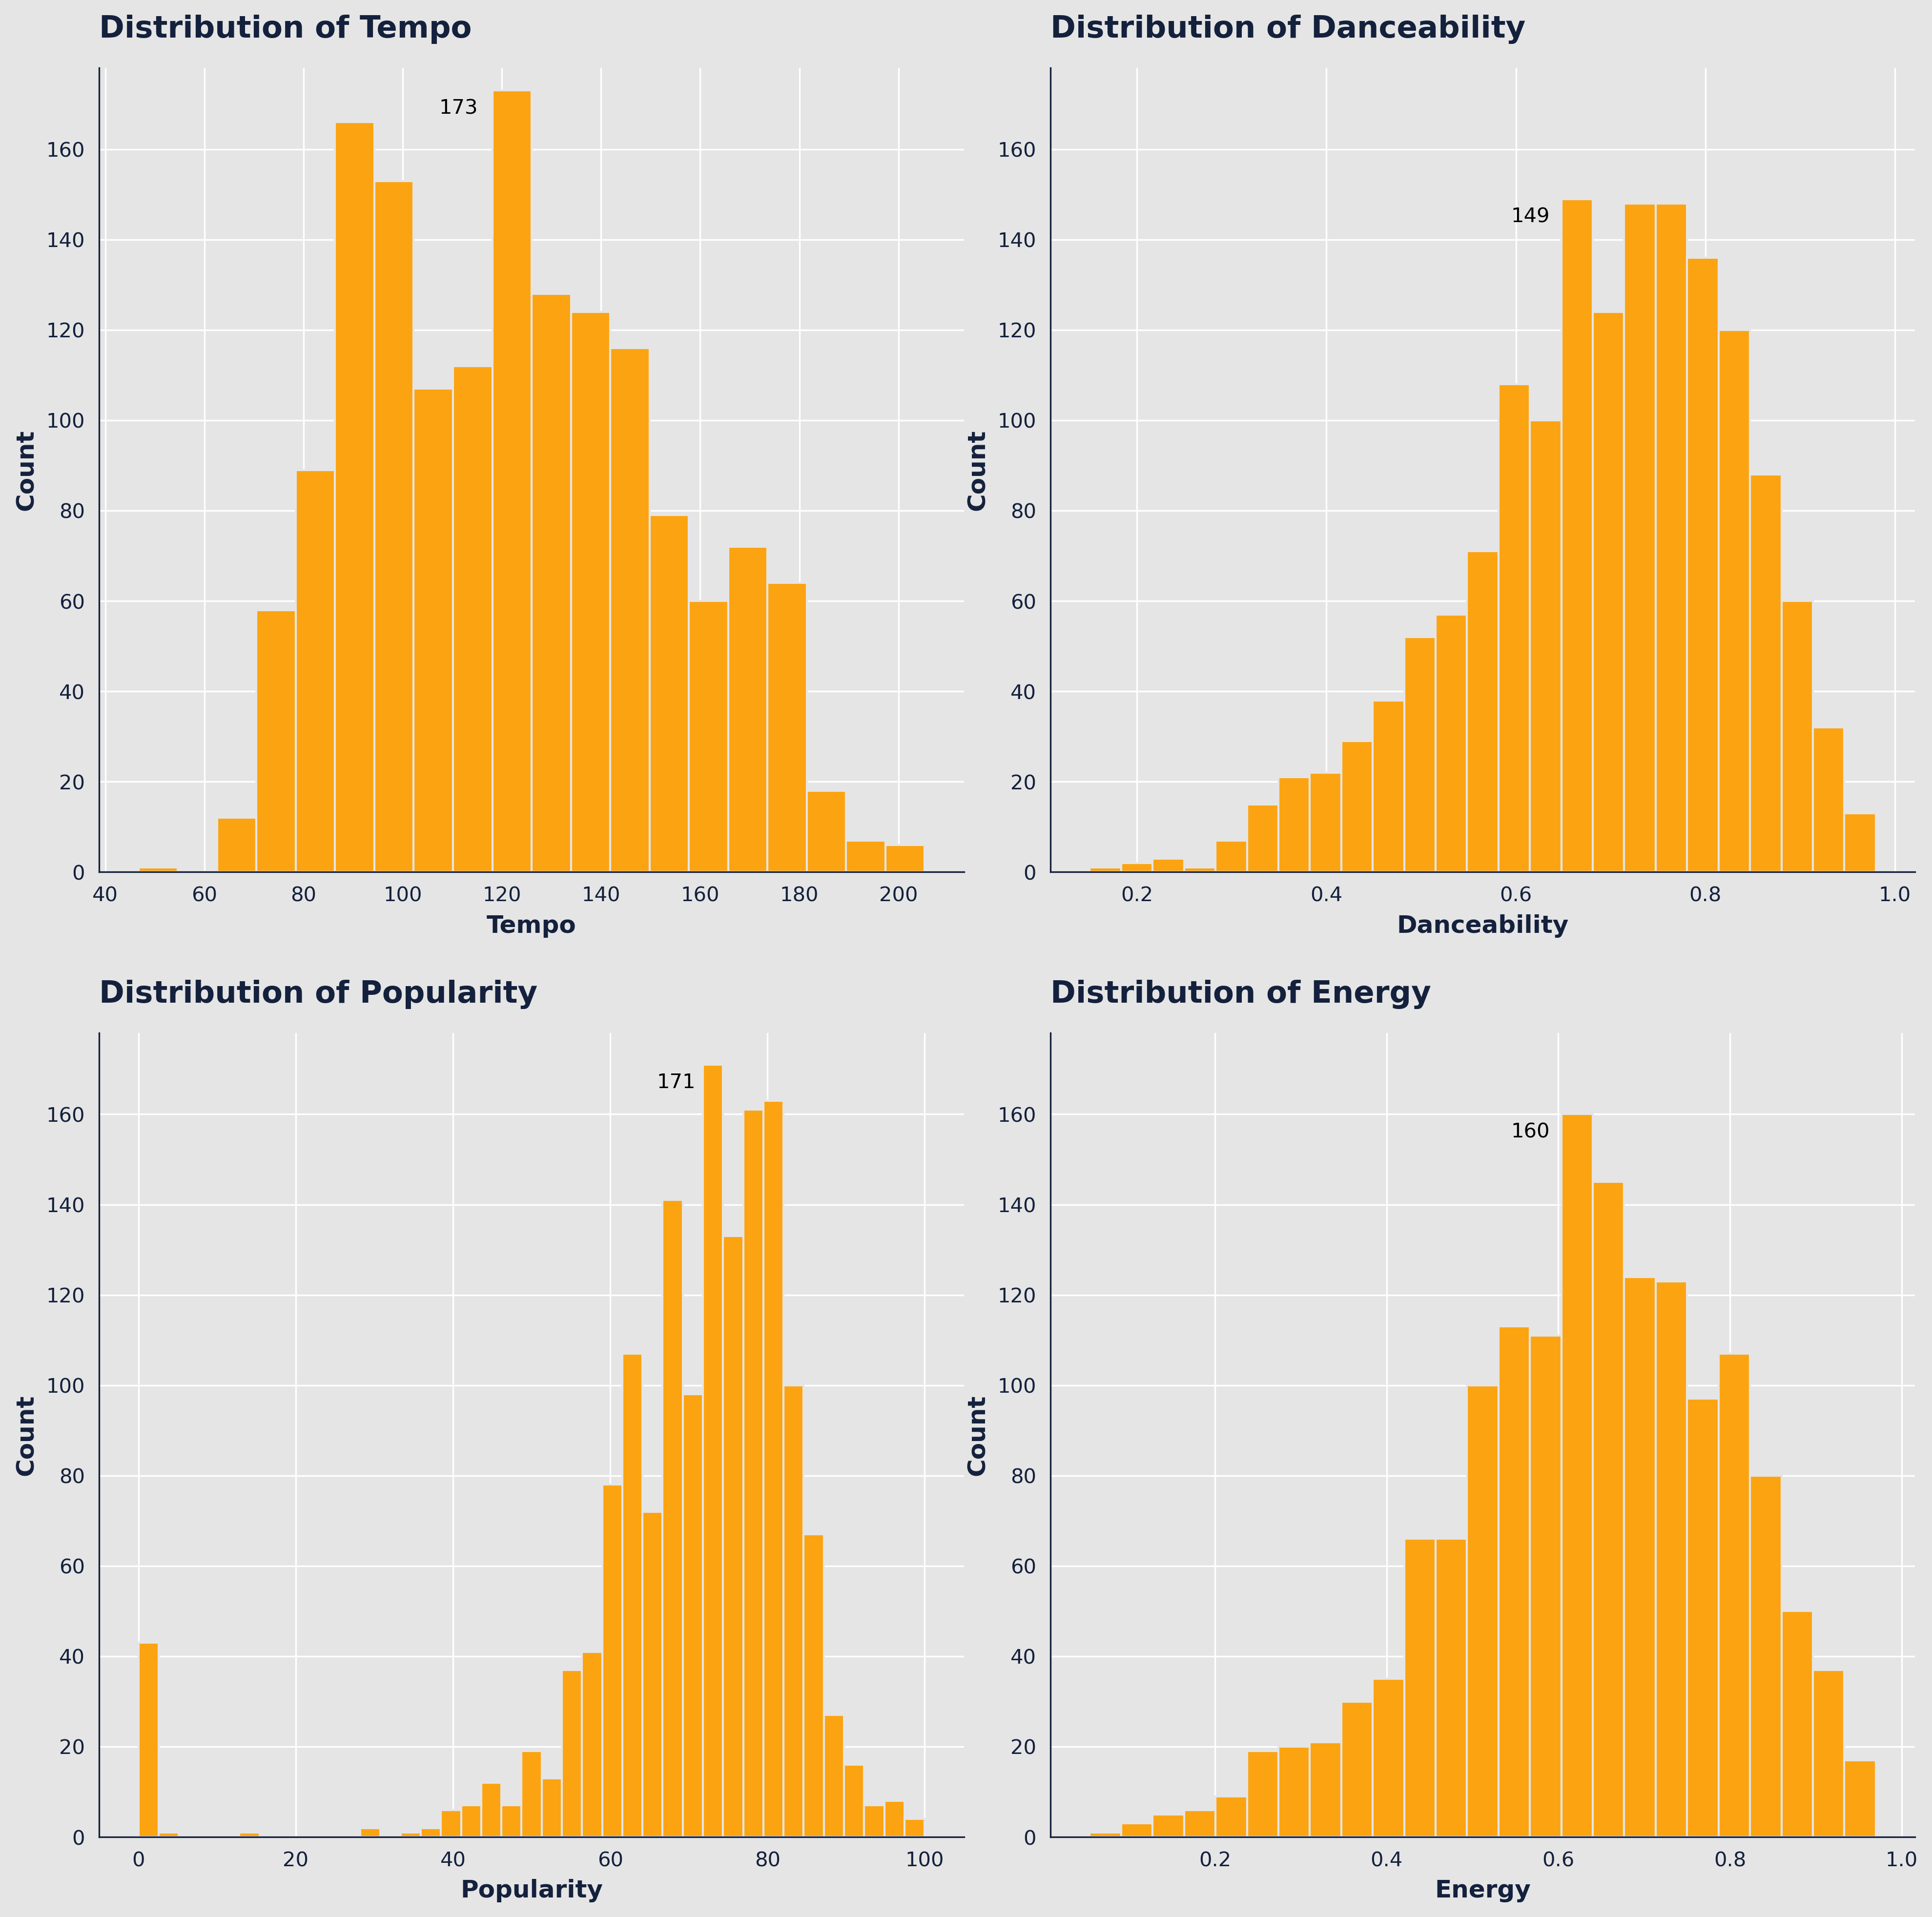

In [98]:
# Color Definition
bg_color = '#e5e5e5'
grid_color = '#ffffff'
accent_color = '#fca311'
medium_color = '#14213d'
dark_color = '#000000'

mpl.rcParams['axes.titlecolor'] = medium_color
mpl.rcParams['axes.edgecolor'] = medium_color
mpl.rcParams['axes.labelcolor'] = medium_color
mpl.rcParams['xtick.labelcolor'] = medium_color
mpl.rcParams['ytick.labelcolor'] = medium_color
plt.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize=(16, 16), facecolor=bg_color)
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.1, hspace=0.2)

plot_no = 0
for row in range(2):
    for col in range(2):
        locals()['ax'+str(plot_no)] = fig.add_subplot(gs[row, col])
        locals()['ax'+str(plot_no)].set_facecolor(bg_color)
        locals()['ax'+str(plot_no)].spines[['top', 'right']].set_visible(False)
        plot_no += 1
        
# Store plot Data in a list to use them in loop for plotting
data = [df['Tempo'], df['Danceability'], df['Popularity'], df['Energy']]

plot_no = 0
for row in range(2):
    for col in range(2):
        sns.histplot(ax=locals()['ax'+str(plot_no)], data=data[plot_no], alpha=1, color=accent_color, edgecolor=bg_color, zorder=2)
        locals()['ax'+str(plot_no)].set_xlabel(data[plot_no].name, fontsize=12, fontweight='bold')
        locals()['ax'+str(plot_no)].set_ylabel('Count', fontsize=12, fontweight='bold')
        locals()['ax'+str(plot_no)].set_ylim(top=178)
        locals()['ax'+str(plot_no)].tick_params(width=0)
        locals()['ax'+str(plot_no)].grid(which='major', color=grid_color, zorder=0)
        
        locals()['ax'+str(plot_no)].set_title('Distribution of {}'.format(data[plot_no].name), loc='left', fontsize=15, fontweight='bold', pad=15)
        
        peak = 0
        for p in locals()['ax'+str(plot_no)].patches:
            if p.get_height() > peak:
                peak = p.get_height()
                peak_x = p.get_x() - p.get_width() / 2.75
                peak_y = p.get_height() - 4
        locals()['ax'+str(plot_no)].text(peak_x, peak_y, peak, ha='right', va='center',)
        
        plot_no += 1
        
plt.savefig('./plots/4-distribution.png', bbox_inches='tight')

<a id='4.2'></a>
## 4.2 Top Of The World

<a id='4.2.1'></a>
### 4.2.1 Top 10 Artist with Most Time On Chart
Take a look and see who (Artist) has most song on Chart.

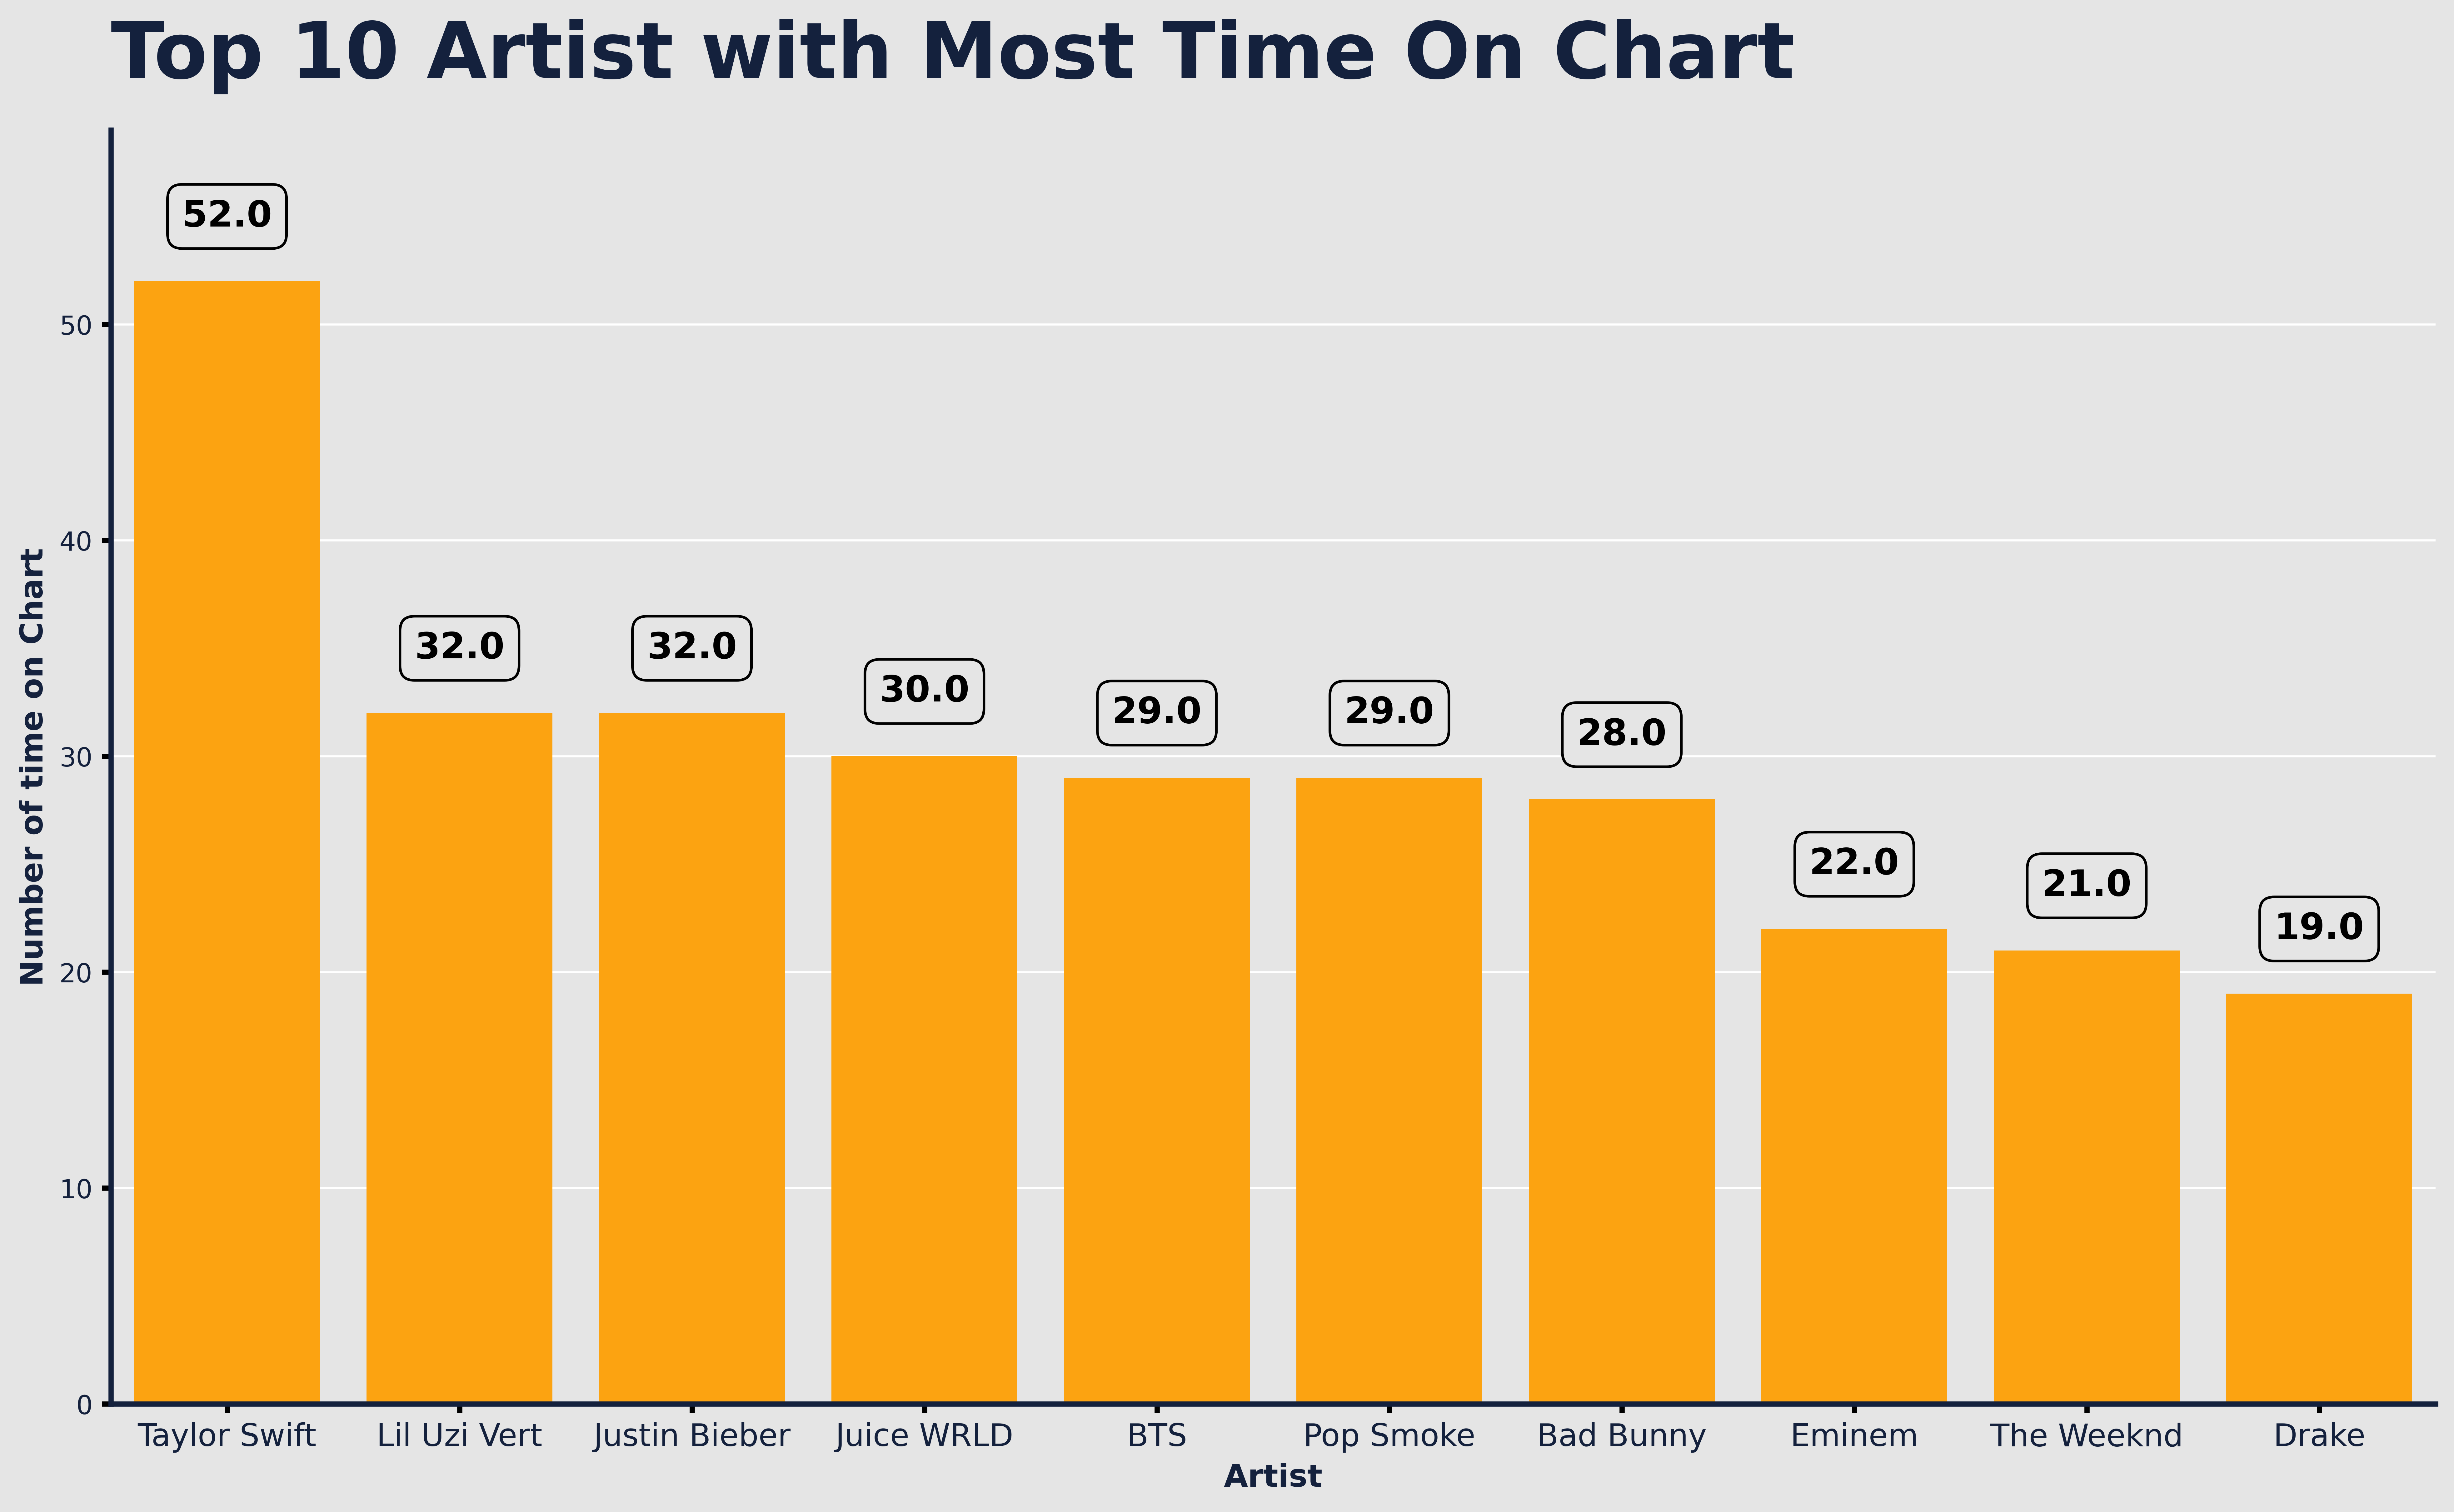

In [170]:
# Group Song by Artist, count them and sort descending
artist_on_chart = df.groupby('Artist').count().sort_values(by='Streams', ascending=False)

plt.rcParams['figure.dpi'] = 600
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.labelsize'] = 12

fig = plt.figure(figsize=(16, 9), facecolor=bg_color)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.spines[['top', 'right']].set_visible(False)
ax.set_facecolor(bg_color)

# Use head() to plot only top10
plot_data = artist_on_chart.head(10)
sns.barplot(ax=ax, x=plot_data.index, y=plot_data['Streams'], color=accent_color, saturation=1, zorder=2)
ax.set_title('Top 10 Artist with Most Time On Chart', loc='left', pad=20)
ax.set_ylabel('Number of time on Chart')
ax.set_ylim(top=59)
ax.grid(which='major', axis='y', color=grid_color, zorder=0)


# Add Bar (Artist) Label
for p in ax.patches:
    value = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 3
    ax.text(x, y, value, ha='center', va='center', fontsize=14, fontweight='bold', bbox=dict(boxstyle='round', pad=0.4, facecolor=bg_color, ))
    
plt.savefig('./plots/top10_artist_on_chart', bbox_inches='tight')

<a id='4.2.2'></a>
### 4.2.2 Top 5 Some with Highest Streams

In [172]:
# prepare Data
highest_streams = df.sort_values(by='Streams', ascending=False)[['Song Name', 'Streams']]
# Streams Attribute is a big int, 
# for beautifylly plotting, we reduce it to smaller decimal number and add postfix 'M' for 'Million'
highest_streams['Streams'] = highest_streams['Streams'] // 10000 # Reduce the decimal point
highest_streams['Streams'] = highest_streams['Streams'] / 100 # So after this operation, we have all Streams entries decimal number with 2 decimal point
highest_streams['Streams Label'] = highest_streams['Streams'].astype('str') # We use this Attribute to add text to our plot
highest_streams['Streams Label'] = highest_streams['Streams Label'] + ' M' # Add postfix 'M'

# Take a look to see if something went wrong
highest_streams.head()

,Song Name,Streams,Streams Label
0,Beggin',48.63,48.63 M
1,STAY (with Justin Bieber),47.24,47.24 M
2,good 4 u,40.16,40.16 M
3,Bad Habits,37.79,37.79 M
4,INDUSTRY BABY (feat. Jack Harlow),33.94,33.94 M


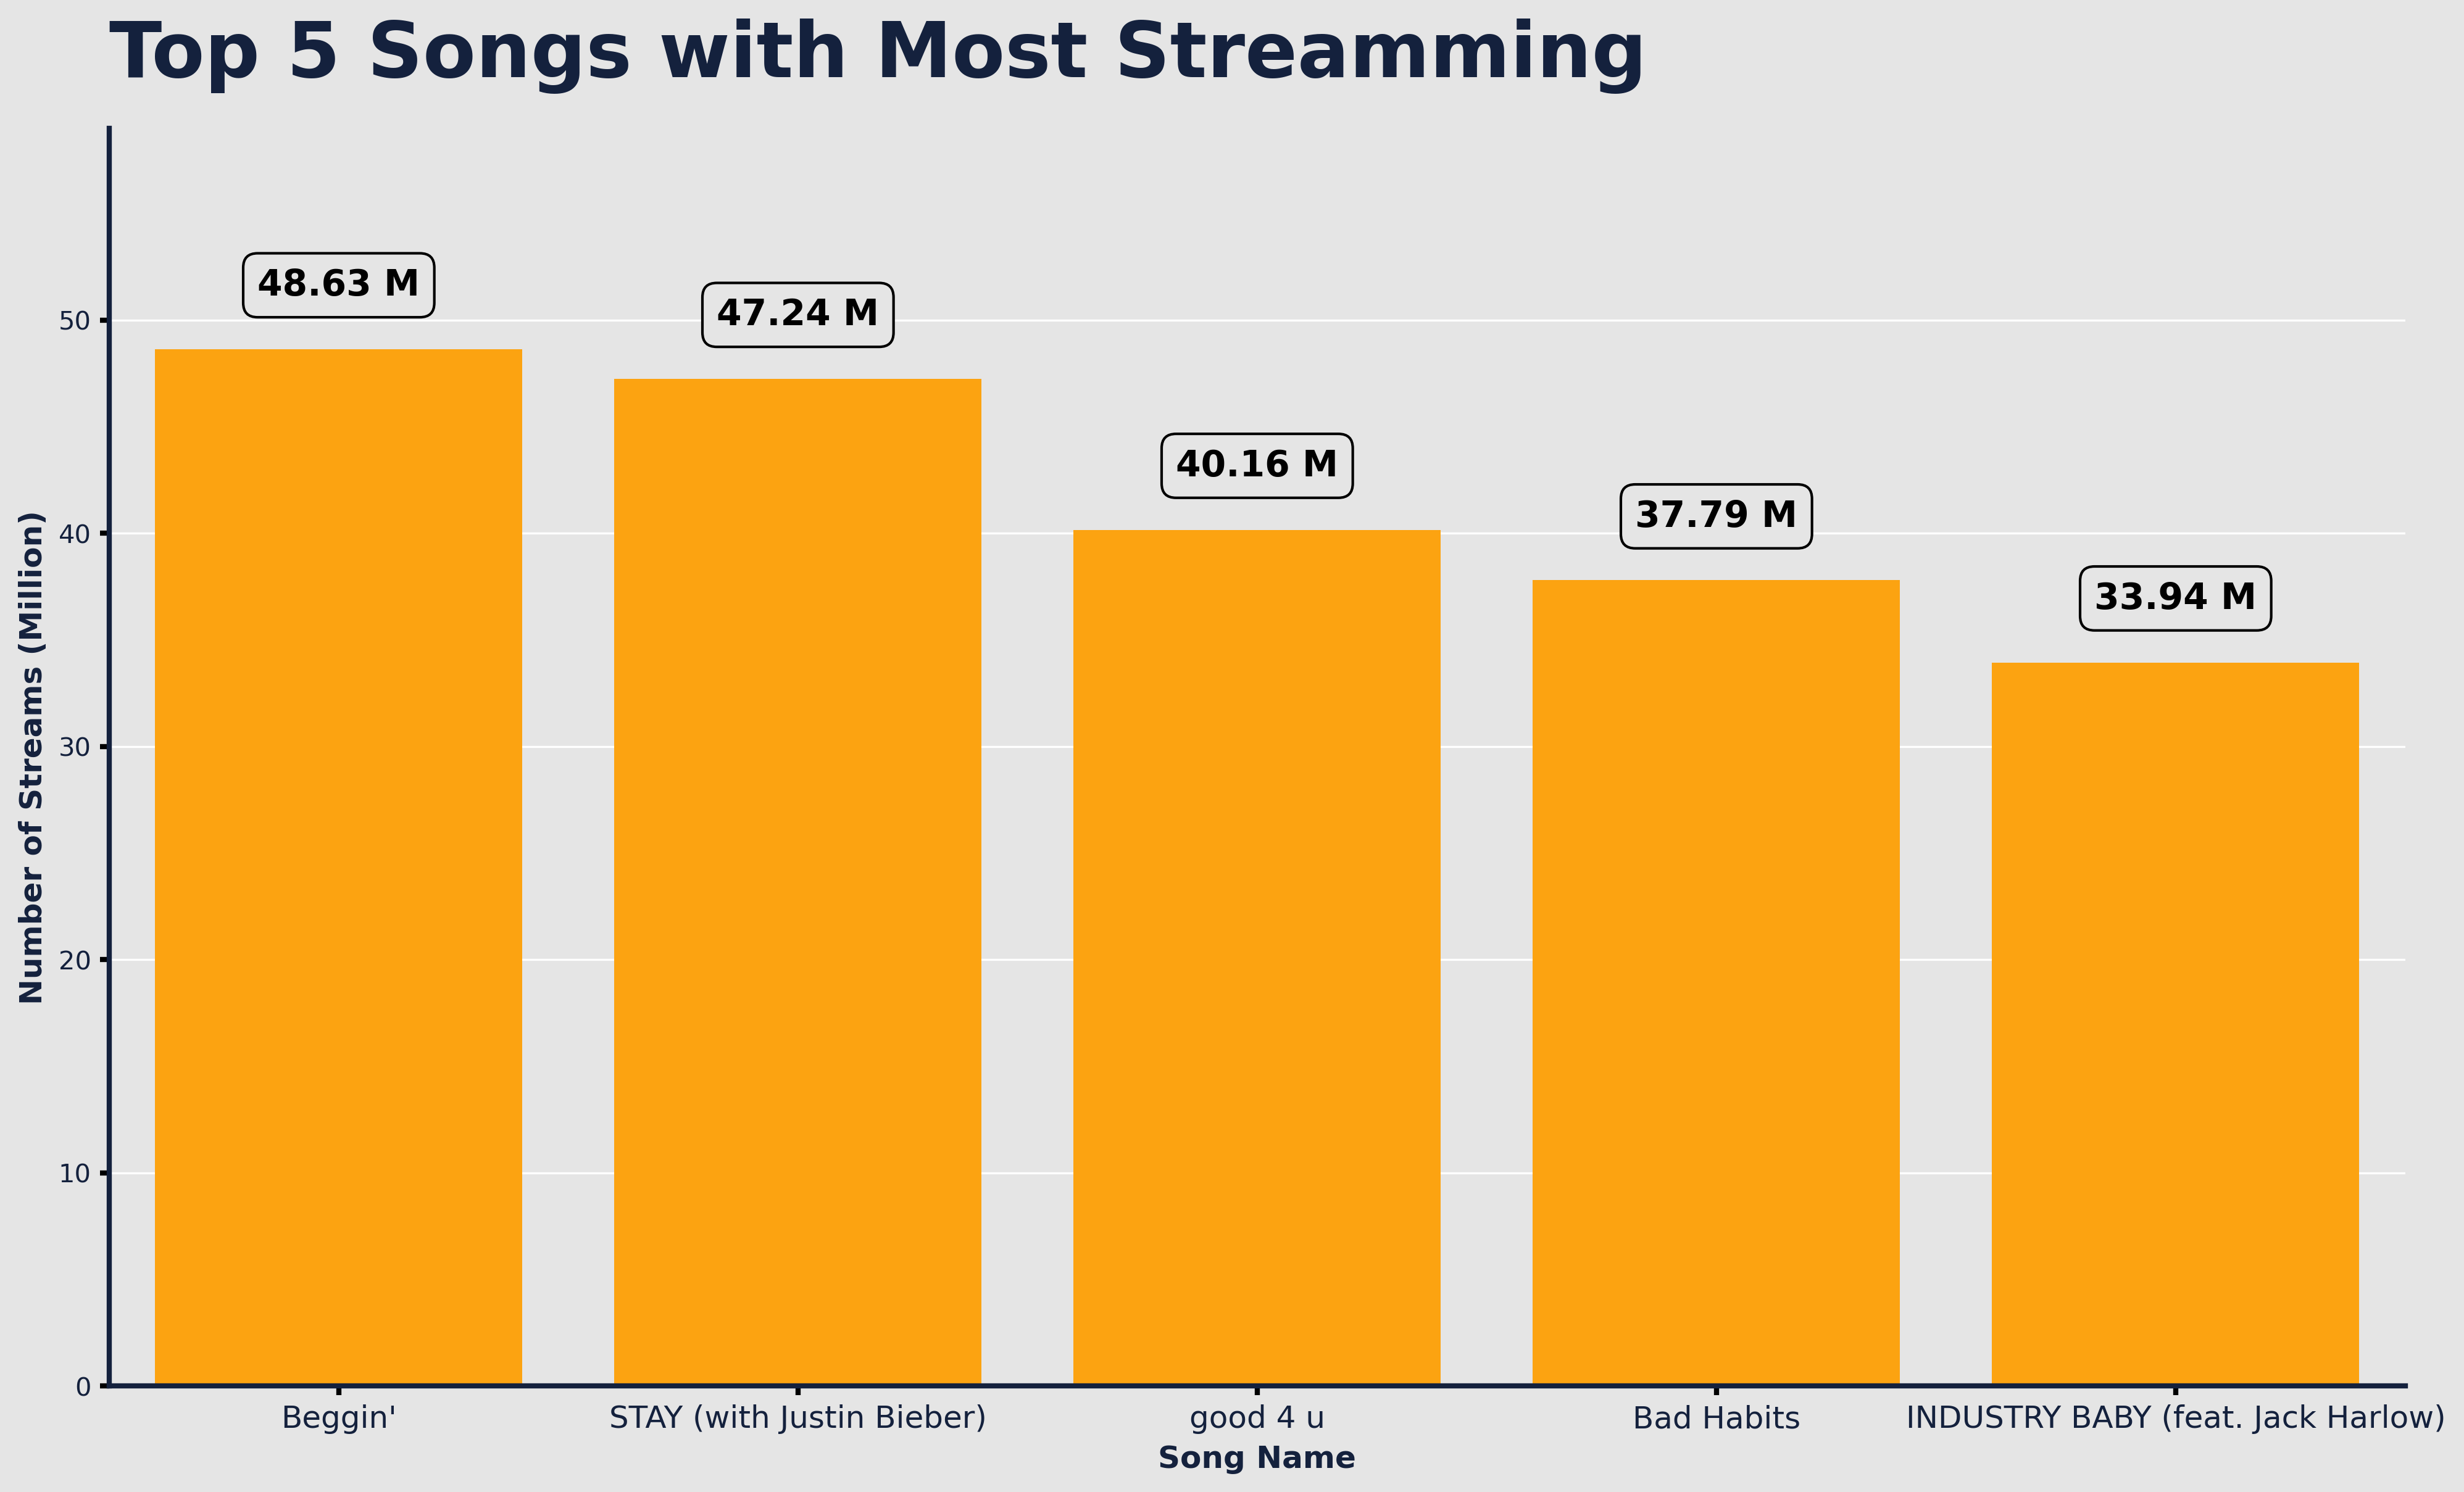

In [181]:
plt.rcParams['figure.dpi'] = 300
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.labelsize'] = 12

fig = plt.figure(figsize=(16, 9), facecolor=bg_color)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.spines[['top', 'right']].set_visible(False)
ax.set_facecolor(bg_color)

# Use head() to plot only top5
plot_data = highest_streams.head()
sns.barplot(ax=ax, x=plot_data['Song Name'], y=plot_data['Streams'],
            color=accent_color, saturation=1, zorder=2)
ax.set_title('Top 5 Songs with Most Streamming', loc='left', pad=20)
ax.set_ylabel('Number of Streams (Million)')
ax.set_ylim(top=59)
ax.grid(which='major', axis='y', color=grid_color, zorder=0)


# Add Bar (Artist) Label
bar_no = 0
for p in ax.patches:
    value = plot_data.loc[bar_no, 'Streams Label']
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 3
    ax.text(x, y, value, ha='center', va='center', fontsize=14, fontweight='bold', bbox=dict(boxstyle='round', pad=0.4, facecolor=bg_color, ))
    bar_no += 1
    
plt.savefig('./plots/top5_most_streams', bbox_inches='tight')